<a href="https://colab.research.google.com/github/vault5673/Exploratory-Data-Analysis/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import necessary Libraries
import pandas as pd
import numpy as np

In [2]:
#Read the Dataset using pansad
df = pd.read_csv('/content/Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Display basic statistics of numeric features
print("Summary Statistics:")
(df.describe())


Summary Statistics:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


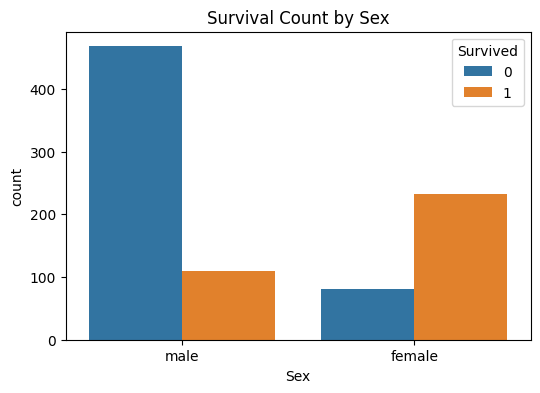

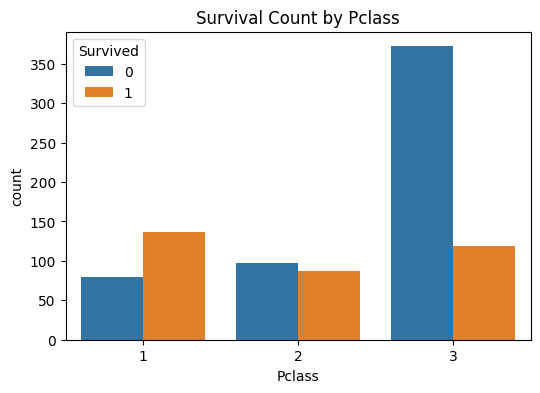

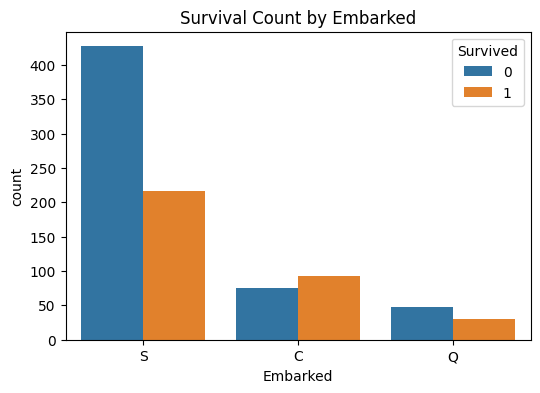

In [18]:
categorical_cols = ['Sex', 'Pclass', 'Embarked']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='Survived', data=df)
    plt.title(f"Survival Count by {col}")
    plt.show()

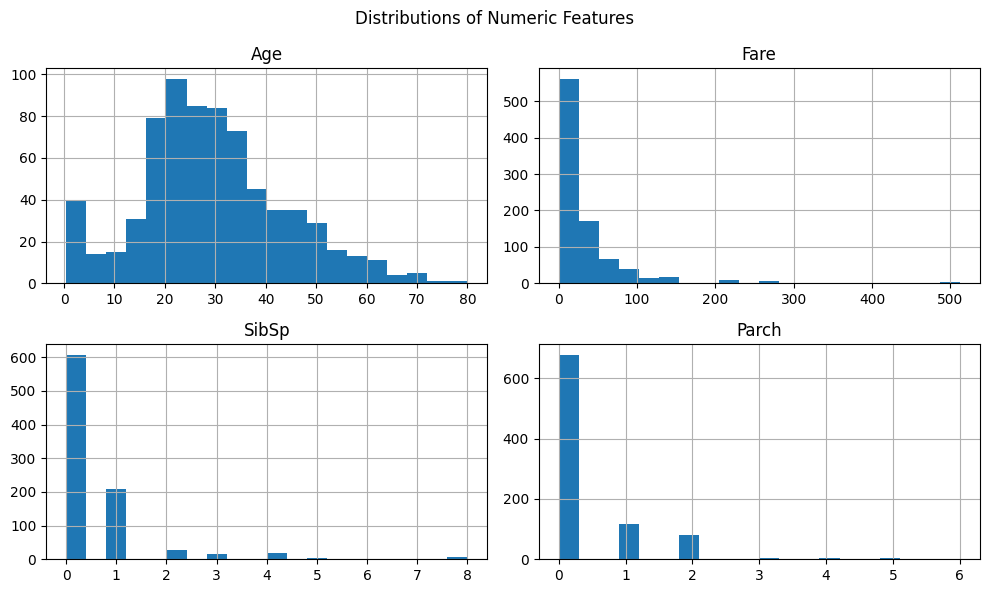

In [7]:
# Histograms for Age, Fare, SibSp, Parch
import matplotlib.pyplot as plt
df[['Age', 'Fare', 'SibSp', 'Parch']].hist(bins=20, figsize=(10, 6))
plt.suptitle("Distributions of Numeric Features")
plt.tight_layout()
plt.show()

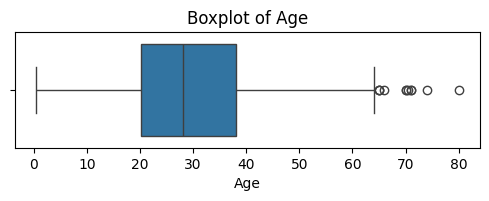

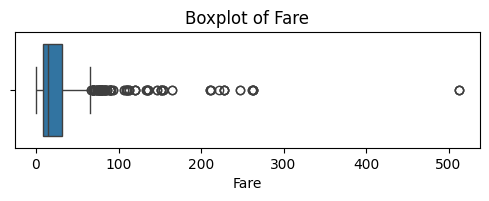

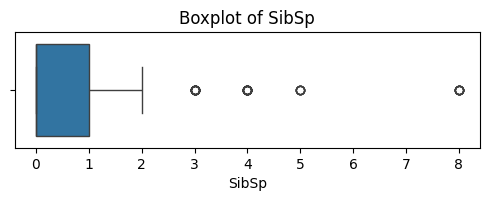

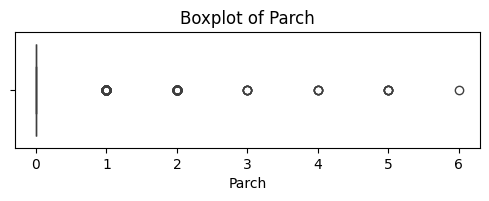

In [8]:
# Plot boxplots to visualize outliers
import seaborn as sns
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']
for feature in numeric_features:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()

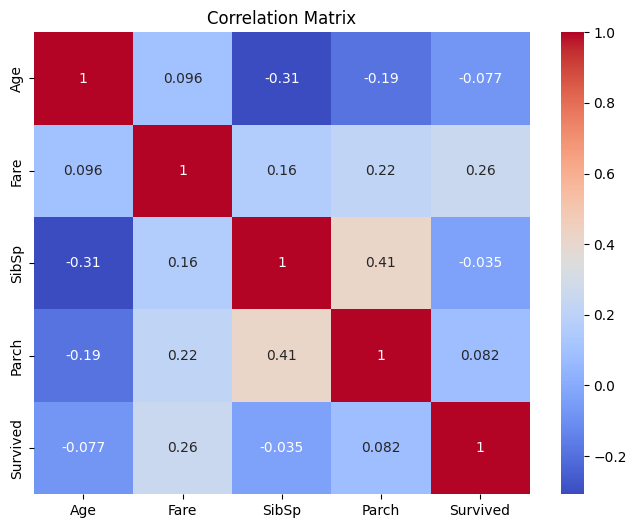

In [9]:
# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_features + ['Survived']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

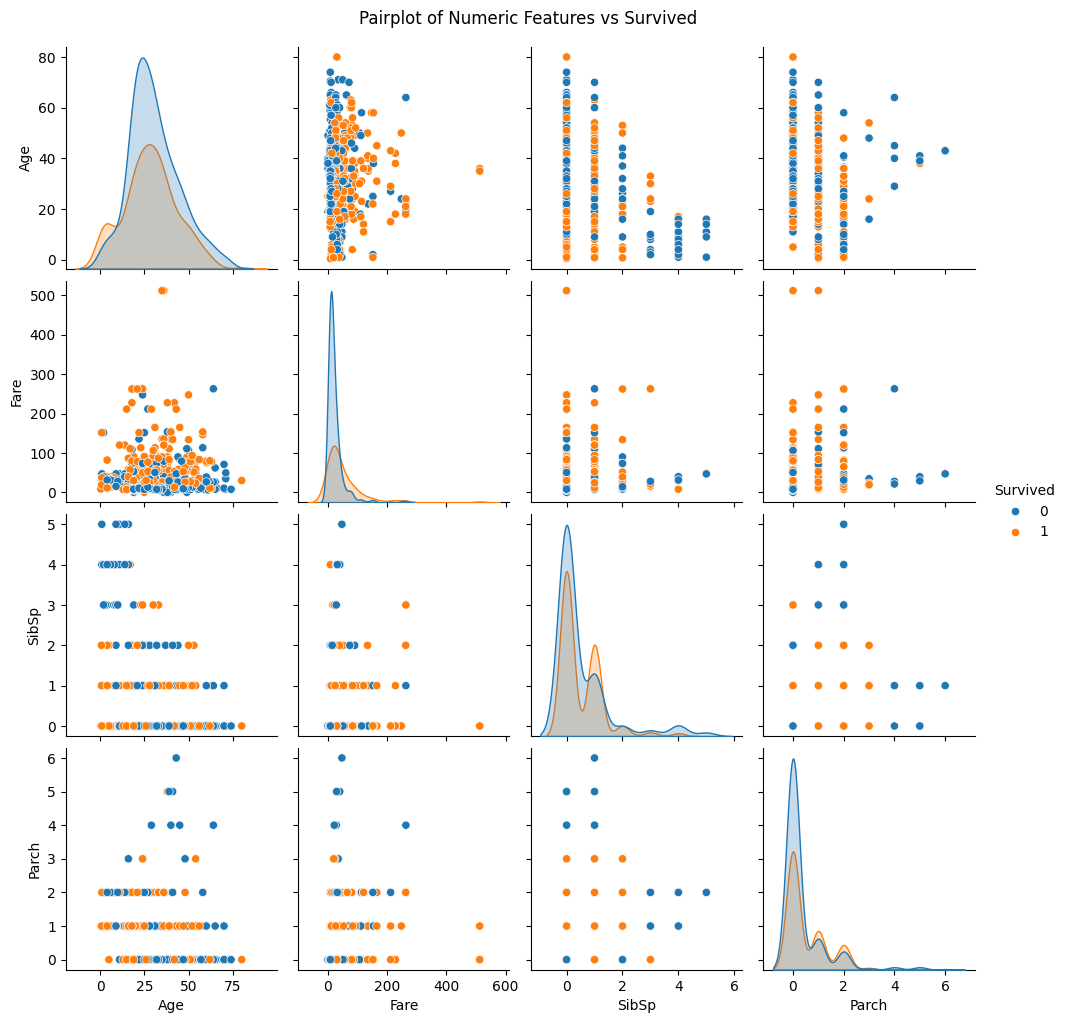

In [10]:
# Drop rows with missing values for pairplot
sns.pairplot(df[numeric_features + ['Survived']].dropna(), hue='Survived')
plt.suptitle("Pairplot of Numeric Features vs Survived", y=1.02)
plt.show()

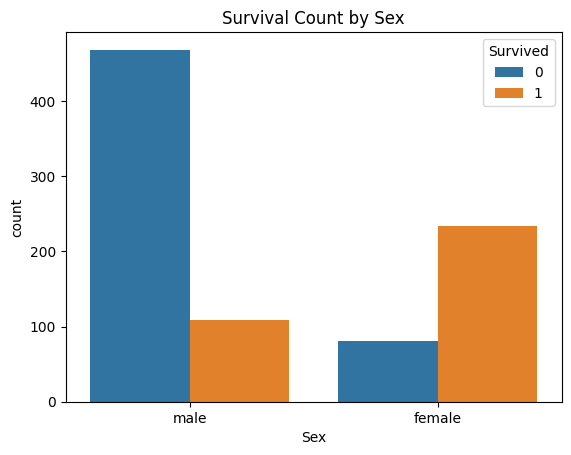

In [11]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival Count by Sex")
plt.show()

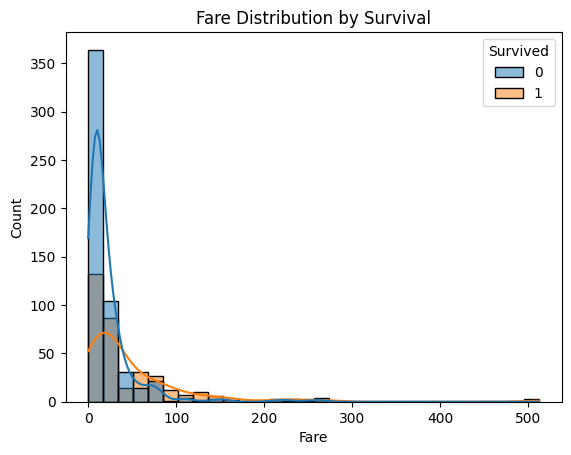

In [12]:
sns.histplot(data=df, x='Fare', hue='Survived', bins=30, kde=True)
plt.title("Fare Distribution by Survival")
plt.show()

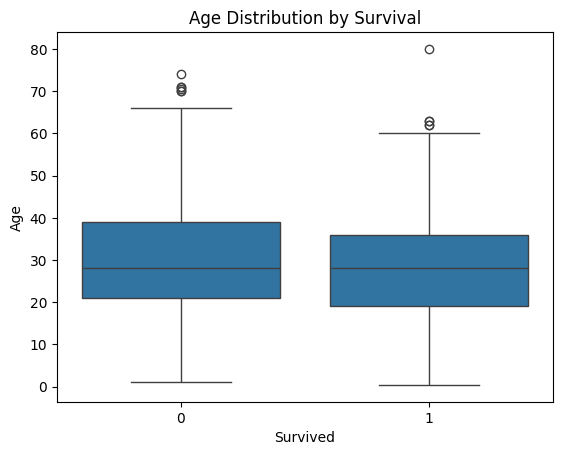

In [13]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age Distribution by Survival")
plt.show()

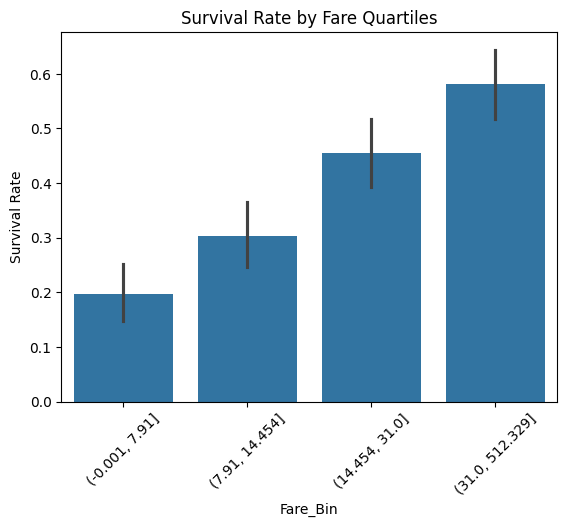

In [14]:
df['Fare_Bin'] = pd.qcut(df['Fare'], 4)
sns.barplot(x='Fare_Bin', y='Survived', data=df)
plt.xticks(rotation=45)
plt.title("Survival Rate by Fare Quartiles")
plt.ylabel("Survival Rate")
plt.show()

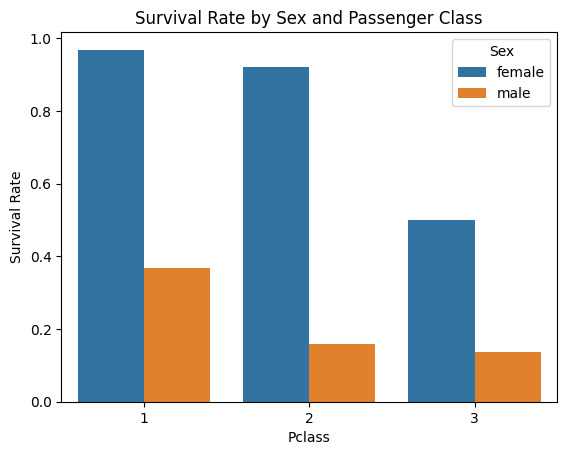

In [15]:
grouped = df.groupby(['Sex', 'Pclass'])['Survived'].mean().reset_index()
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=grouped)
plt.title("Survival Rate by Sex and Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

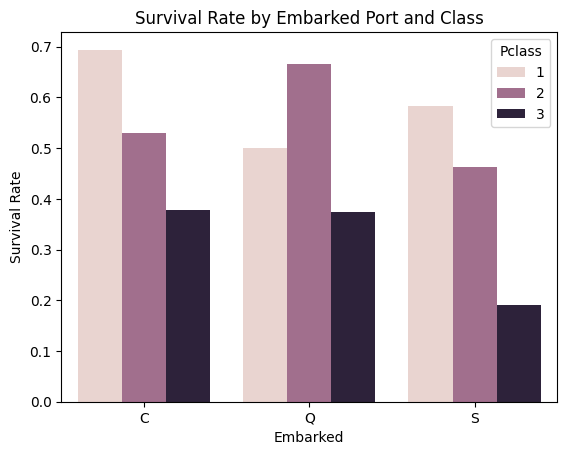

In [16]:
grouped = df.groupby(['Embarked', 'Pclass'])['Survived'].mean().reset_index()
sns.barplot(x='Embarked', y='Survived', hue='Pclass', data=grouped)
plt.title("Survival Rate by Embarked Port and Class")
plt.ylabel("Survival Rate")
plt.show()

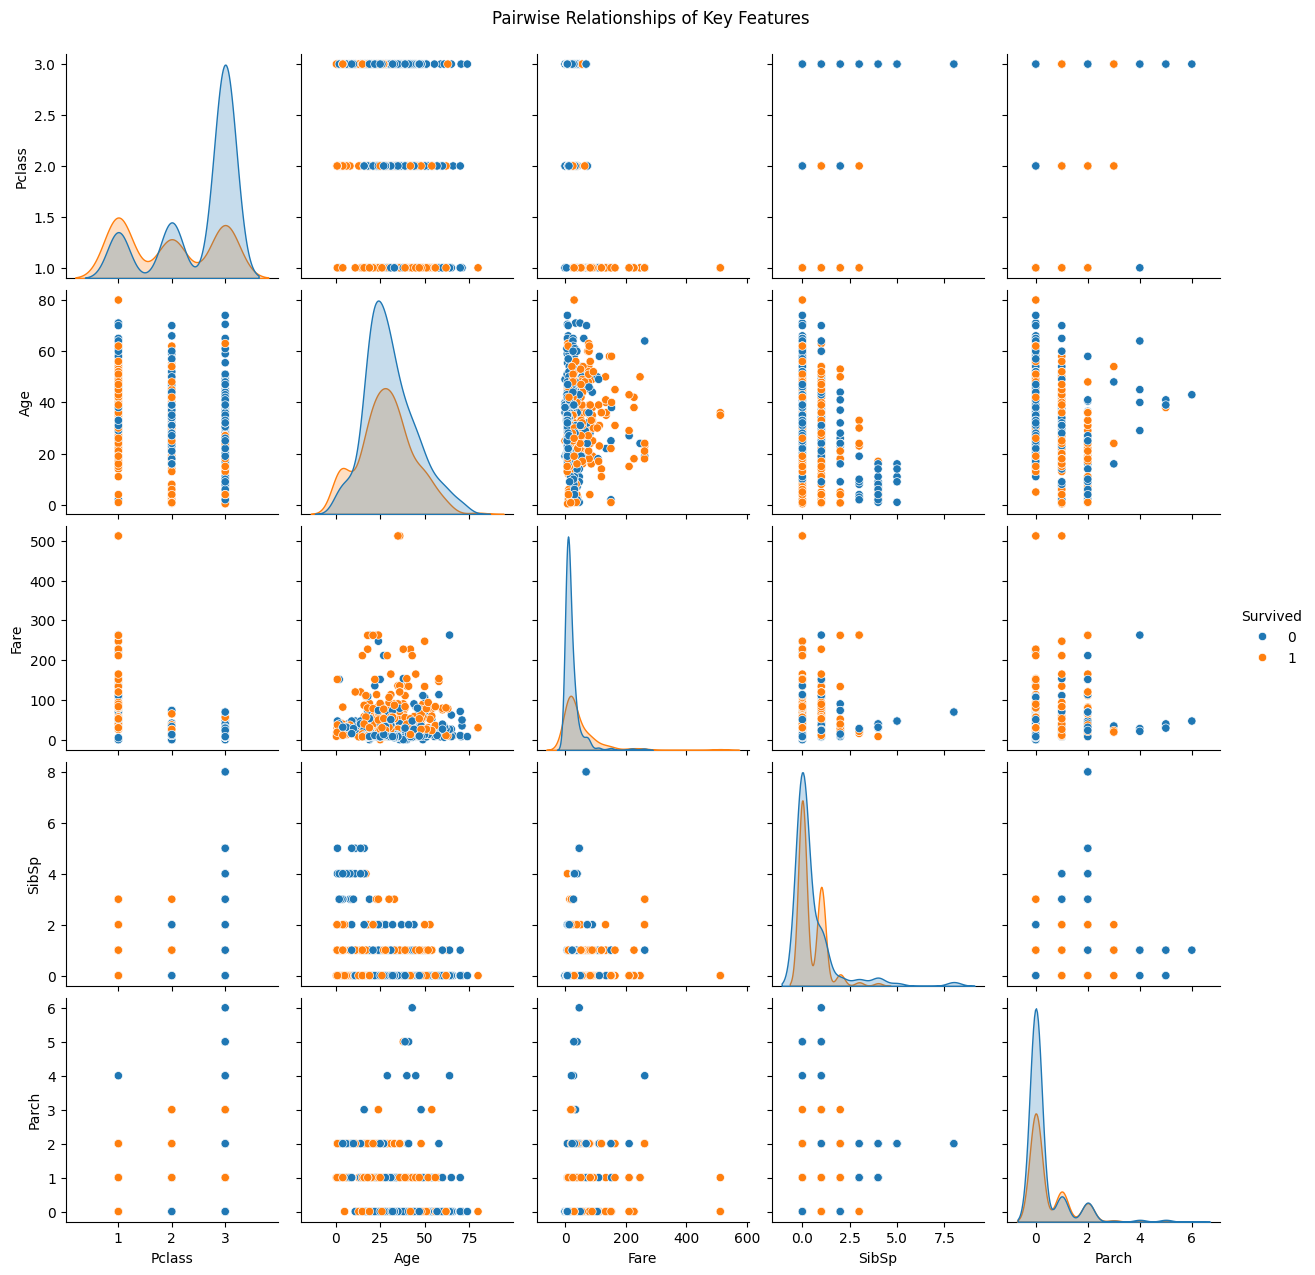

In [17]:
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']], hue='Survived')
plt.suptitle("Pairwise Relationships of Key Features", y=1.02)
plt.show()